In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/heart_failure_clinical_records_dataset - heart_failure_clinical_records_dataset.csv')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/heart_failure_clinical_records_dataset - heart_failure_clinical_records_dataset.csv'

In [27]:
df.shape

(299, 13)

In [ ]:
df.info()
df.describe()

In [13]:
x=df.iloc[:,:-1]
y=df['DEATH_EVENT']

In [ ]:
df.isna().sum()

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['DEATH_EVENT'], y=df['age'])
plt.xlabel('Death Event')
plt.ylabel('Age')
plt.title('Box Plot: Age vs Death Event')
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
scaler = MinMaxScaler()
scaler.fit_transform(x_train)
scaler.fit_transform(x_test)


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import PReLU,LeakyReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [49]:
classifier=Sequential()

In [50]:
classifier.add(Dense(units=13,activation='relu'))
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dense(units=5,activation='relu'))
classifier.add(Dense(units=3,activation='relu'))

In [51]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [52]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

In [55]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

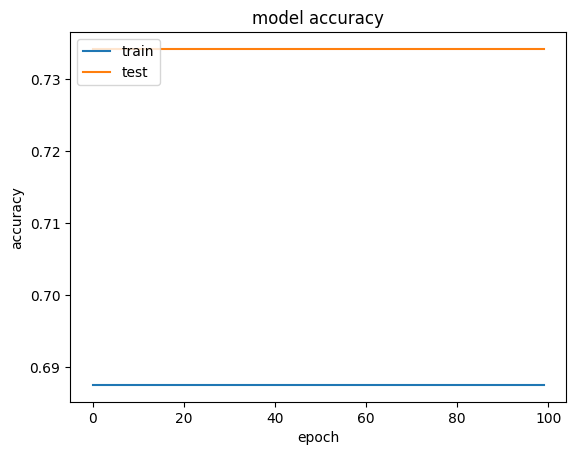

In [57]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [67]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.5833333333333334, 0.0, 0.0, 0.0)

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [61]:
cn=confusion_matrix(y_test,y_pred)
print(cn)

[[35  0]
 [25  0]]


In [63]:
score=accuracy_score(y_pred,y_test)
score

0.5833333333333334

In [72]:

model2 = Sequential([
    Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(16, activation='relu'),
    Dropout(0.4),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.4245 - loss: 17869.7188 - val_accuracy: 0.5833 - val_loss: 1227.4310
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6965 - loss: 1325.8192 - val_accuracy: 0.5833 - val_loss: 12.0177
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7151 - loss: 586.1272 - val_accuracy: 0.5833 - val_loss: 0.6887
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6861 - loss: 148.0173 - val_accuracy: 0.5833 - val_loss: 0.6878
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7174 - loss: 88.5277 - val_accuracy: 0.5833 - val_loss: 0.6863
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7031 - loss: 38.2182 - val_accuracy: 0.5833 - val_loss: 0.6851
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7467 - loss: 6.0695 - val_accuracy: 0.5833 - val_loss: 0.6836
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6484 - loss: 12.6517 - val_accuracy: 0.5833 -